In [23]:
import snscrape.modules.twitter as sntwitter

In [22]:
import pandas as pd

In [24]:
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns

In [26]:
import re 

In [27]:
import scipy

In [20]:
from spacy import displacy

In [28]:
from scipy import displacy

ImportError: cannot import name 'displacy' from 'scipy' (C:\Users\ameer\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py)

In [29]:
import spacy

In [30]:
from spacy import displacy

In [31]:
from collections import Counter


In [32]:
import en_core_web_sm

In [17]:
nlp = en_core_web_sm.load()

NameError: name 'en_core_web_sm' is not defined

In [18]:
nlp = spacy.load("en_core_web_sm")

In [51]:
# Setting variables to be used below
maxTweets = 10000

# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('(#SpotifyWrapped) lang:en until:2022-12-08 since:2020-01-01').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

C:\Users\ameer\AppData\Local\Temp\ipykernel_38152\2965406941.py:11: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])


"# Setting variables to be used below\nmaxTweets = 500000\n\n# Creating list to append tweet data to\ntweets_list = []\n\n# Using TwitterSearchScraper to scrape data and append tweets to list\nfor i,tweet in enumerate(sntwitter.TwitterSearchScraper('horribleBosses since:2022-03-21 until:2022-03-30').get_items()):\n    if i>maxTweets:\n        break\n    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])"

In [34]:

#Creating a dataframe from the tweets list above


df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_Id', 'text', 'Username'])

# Display first 5 entries from dataframe
df.head()

,datetime,tweet_Id,text,Username
0,2022-12-07 23:59:57+00:00,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN
1,2022-12-07 23:59:27+00:00,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2
2,2022-12-07 23:59:23+00:00,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays
3,2022-12-07 23:59:02+00:00,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke
4,2022-12-07 23:58:59+00:00,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22


In [52]:

# write the dataframe into a csv 
df.to_csv('tweets.csv')


In [53]:
# read data into a dataframe
data =pd.read_csv('tweets.csv')

In [54]:

data.shape

(5001, 5)

In [55]:
#view the first few lines of the dataframe
data.head()

,Unnamed: 0,datetime,tweet_Id,text,Username
0,0,2022-12-07 23:59:57+00:00,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN
1,1,2022-12-07 23:59:27+00:00,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2
2,2,2022-12-07 23:59:23+00:00,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays
3,3,2022-12-07 23:59:02+00:00,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke
4,4,2022-12-07 23:58:59+00:00,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22


In [56]:
#view first 20 rows of data
data.text[0:20]

0     I may or may not have music in my soul\n\nThis...
1     Thanks Granger Smith for spending 869 minutes ...
2     @SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...
3     Thanks Watsky for spending 251 minutes with me...
4     Thanks @skilletmusic for spending 1,054 minute...
5     Thanks @weareoneexo for spending 3,057 minutes...
6     Thanks Scrubs for being my top podcast on @Spo...
7     Thanks @billieeilish for spending 6,157 minute...
8     Thanks @benandbenmusic for spending 3,506 minu...
9     Thanks Ice Nine Kills for spending 6,644 minut...
10    Thanks The Temper Trap for spending 680 minute...
11    Thanks @dadju for spending 3,695 minutes with ...
12    Thanks Fred again.. for spending 4,717 minutes...
13    Thanks Dave Tate's Table Talk for being my top...
14    Thanks Unsolved Murders: True Crime Stories fo...
15    Thanks Dan Bongino Show for being my top podca...
16    Thanks @mcrofficial for spending 17,542 minute...
17    Thanks @cigsaftersexx for spending 9,577 m

In [57]:

#convert the datetime to date
data.datetime= pd.to_datetime(data.datetime).dt.date

In [58]:

# view the data frame again
data.head()

,Unnamed: 0,datetime,tweet_Id,text,Username
0,0,2022-12-07,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN
1,1,2022-12-07,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2
2,2,2022-12-07,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays
3,3,2022-12-07,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke
4,4,2022-12-07,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22


In [59]:

#group counts of tweets by date
dt=data.groupby('Username').size()
dt

Username
007KaosJR          1
02shofia__         1
06kinger           1
0Silencer          1
0fficialLT         1
                  ..
zsu_zsus_petals    1
ztj1989            1
zweidiereisen      1
zyanul             1
zyphen0            1
Length: 4695, dtype: int64

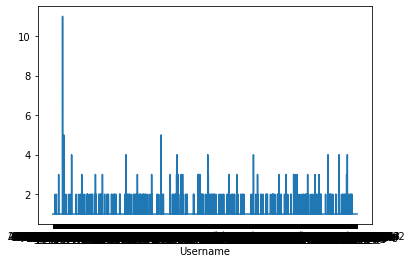

In [60]:

#plot linechat of tweets by day
sns.lineplot(err_style="bars",
			data = dt);

In [61]:

#clean the tweets and add a new column of the clean data
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet
data['clean'] = data['text'].map(lambda x: cleaner(x))

In [62]:

#view the new data frame
data.head()

,Unnamed: 0,datetime,tweet_Id,text,Username,clean
0,0,2022-12-07,1600641292366938112,I may or may not have music in my soul\n\nThis...,AbainTN,I may or may not have music in my soul This ye...
1,1,2022-12-07,1600641166273224705,Thanks Granger Smith for spending 869 minutes ...,patriotcowgirl2,Thanks Granger Smith for spending 869 minutes ...
2,2,2022-12-07,1600641152080044032,@SpotifyAfrica @asakemusik HANDS UP IF YOU HAV...,Anerdsays,HANDS UP IF YOU HAVE A PREMIUM SPOTIFY ACCOUNT...
3,3,2022-12-07,1600641062221090817,Thanks Watsky for spending 251 minutes with me...,thewisestbrooke,Thanks Watsky for spending 251 minutes with me...
4,4,2022-12-07,1600641051353845760,"Thanks @skilletmusic for spending 1,054 minute...",VictoriaJackm22,"Thanks for spending 1,054 minutes with me in 2..."


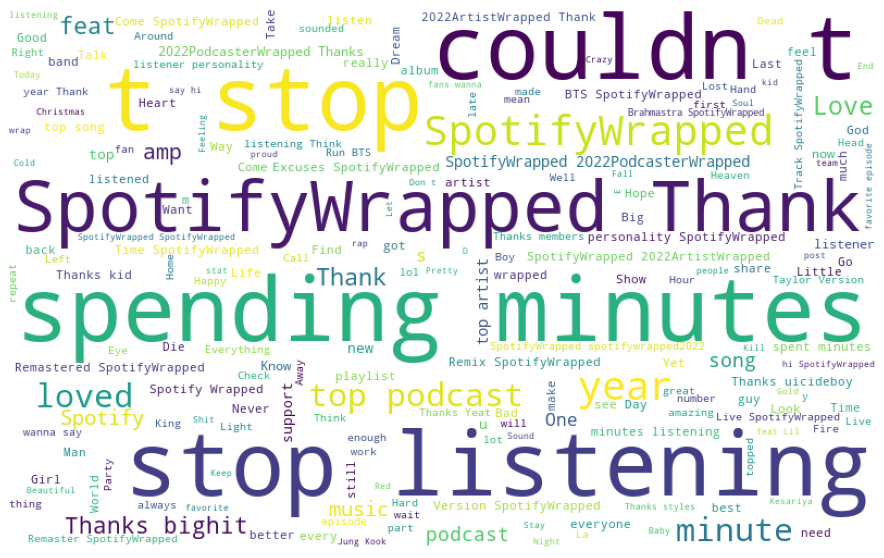

In [63]:

#create a wordcloud to view the most used words in the clean tweets

all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [64]:
import spacy

In [65]:
from spacy.tokens import Token

In [66]:
import spacy
nlp = spacy.load("en_core_web_sm")

c:\Users\ameer\anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [67]:
# extract tokens using spacy library
tokenizer = nlp.tokenizer
tokens = tokenizer(''.join(str(data.clean.tolist())))

In [68]:
#show tokens and entity 
doc = nlp(tokens)


for ent in doc.ents:
    print(ent.text,  ent.label_)

This year DATE
77,677 minutes QUANTITY
Thanks Granger Smith WORK_OF_ART
869 minutes TIME
2022 DATE
Earl Dibbles Jr. PERSON
Watsky PERSON
251 minutes TIME
2022 DATE
Welcome To The Family WORK_OF_ART
1,054 minutes TIME
2022 DATE
Feel Invincible WORK_OF_ART
❤️' ORG
3,057 minutes TIME
2022 DATE
TRANSFORMER - Chinese Version ORG
this year DATE
6,157 minutes TIME
2022 DATE
3,506 minutes TIME
2022 DATE
Paninindigan Kita PERSON
6,644 minutes TIME
2022 DATE
680 minutes QUANTITY
2022 DATE
Fall Together WORK_OF_ART
3,695 minutes TIME
2022 DATE
4,717 minutes TIME
2022 DATE
Hannah PERSON
Thanks Dave Tate's Table Talk WORK_OF_ART
this year DATE
Thanks Unsolved Murders: True Crime Stories WORK_OF_ART
this year DATE
Dan Bongino Show PERSON
this year DATE
17,542 minutes TIME
2022 DATE
The World Is Ugly WORK_OF_ART
9,577 minutes TIME
2022 DATE
Apocalypse ORG
Rizzo PERSON
Gonzo PERSON
christmas SaveLegendsOfTomorrow DATE
🏾 DATE
540 minutes TIME
2022 DATE
Polaroid Love ORG
Trivium ORG
5,483 minutes TIME
2

In [69]:
#count the tokens for most occuring words
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('2022', 3974),
 ('this year', 511),
 ('SpotifyWrapped', 110),
 ('Spotify', 37),
 ('2023', 29),
 ('1', 27),
 ("'This year", 25),
 ('Excuses', 23),
 ('Run BTS', 18),
 ('Thanks Yeat', 17),
 ('2', 16),
 ('One', 16),
 ('Love', 16),
 ('Brahmastra', 15),
 ('spotifywrapped2022', 15),
 ('17', 14),
 ('Kesariya', 13),
 ('21', 12),
 ('Taylor', 12),
 ('first', 12)]

In [70]:
# find nationalites and religious
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

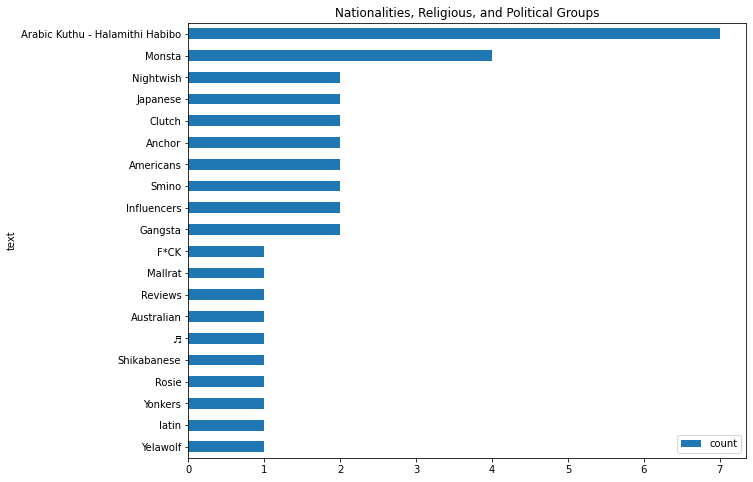

In [73]:
#plot 
df_norp.plot.barh(x='text', y='count', title="Nationalities, Religious, and Political Groups", figsize=(10,8)).invert_yaxis()

In [74]:
gpe_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG':
        gpe_list.append(ent.text)
        
gpe_counts = Counter(gpe_list).most_common(20)
df_gpe = pd.DataFrame(gpe_counts, columns =['text', 'count'])
df_gpe

,text,count
0,SpotifyWrapped,105
1,Run BTS,18
2,spotifywrapped2022,15
3,WRLD,9
4,Vault,9
5,Time,7
6,♥,6
7,Happier Than Ever,6
8,Hills,6
9,NFT,6
